In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Create a series of scatterplots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs Latitude
# Wind Speed (mph) vs. Latitude

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

640

In [4]:
# Perform API Calls
## Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"

city = "east london"
# Build query URL
query_url = f'{url}appid={weather_api_key}&q={city}'       #&id={city_id}'

# get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()


## Include a print log of each city as it'sbeing processed (with the city number and city name).
#cities = ['London','kapaa']
subset_cities = [cities[0],cities[1],cities[2],cities[3],cities[4]]
#city_ids = [117,103, 1,2,3]

In [5]:
# Convert Raw Data to DataFrame
# lat, lon, temp, humidity, cloudiness, windspeed
lon = []
lat = []
temp = [] 
max_temp = []
humidity = []
clouds = []
windspeed = []
city_list = []
city_id_list = []
country_list = []

In [6]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_json

{'coord': {'lon': 27.9116, 'lat': -33.0153},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 296.41,
  'feels_like': 296.29,
  'temp_min': 296.41,
  'temp_max': 296.41,
  'pressure': 1015,
  'humidity': 86,
  'sea_level': 1015,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 6, 'deg': 45, 'gust': 10.73},
 'rain': {'1h': 0.17},
 'clouds': {'all': 69},
 'dt': 1614029890,
 'sys': {'country': 'ZA', 'sunrise': 1613965875, 'sunset': 1614012767},
 'timezone': 7200,
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [7]:
for city in cities:   #subset_cities:
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'

    try:
        # get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        city_id_list.append(weather_json['id'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed']) 
        #Add the city last after everything else works
        print(f'City is: {city}.')
        city_list.append(weather_json['name'])
        country_list.append(weather_json['sys']['country'])
        print(weather_json)
    except:
        print(f'EXCEPTION: {weather_json} for {city}')
    time.sleep(2)
    

City is: moussoro.
{'coord': {'lon': 16.4901, 'lat': 13.6408}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 69.62, 'feels_like': 57.43, 'temp_min': 69.62, 'temp_max': 69.62, 'pressure': 1013, 'humidity': 14, 'sea_level': 1013, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 12.48, 'deg': 19, 'gust': 26.75}, 'clouds': {'all': 20}, 'dt': 1614029891, 'sys': {'country': 'TD', 'sunrise': 1613970850, 'sunset': 1614013274}, 'timezone': 3600, 'id': 2427336, 'name': 'Moussoro', 'cod': 200}
City is: ostrovnoy.
{'coord': {'lon': 39.5131, 'lat': 68.0531}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -6.66, 'feels_like': -27.08, 'temp_min': -6.66, 'temp_max': -6.66, 'pressure': 1041, 'humidity': 85, 'sea_level': 1041, 'grnd_level': 1038}, 'visibility': 10000, 'wind': {'speed': 24.45, 'deg': 221}, 'clouds': {'all': 2}, 'dt': 16140298

EXCEPTION: {'cod': '404', 'message': 'city not found'} for belushya guba
City is: murray.
{'coord': {'lon': -111.888, 'lat': 40.6669}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 44.62, 'feels_like': 38.8, 'temp_min': 42.8, 'temp_max': 46.4, 'pressure': 1030, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 100}, 'clouds': {'all': 1}, 'dt': 1614029926, 'sys': {'type': 1, 'id': 6116, 'country': 'US', 'sunrise': 1614003093, 'sunset': 1614042647}, 'timezone': -25200, 'id': 5778755, 'name': 'Murray', 'cod': 200}
City is: castro.
{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.63, 'feels_like': 66.56, 'temp_min': 66.63, 'temp_max': 66.63, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 188, 'gust

City is: barrow.
{'coord': {'lon': -156.7887, 'lat': 71.2906}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -25.6, 'feels_like': -36.53, 'temp_min': -25.6, 'temp_max': -25.6, 'pressure': 1005, 'humidity': 68}, 'visibility': 2414, 'wind': {'speed': 6.91, 'deg': 100}, 'snow': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1614029960, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 1614018815, 'sunset': 1614048476}, 'timezone': -32400, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
City is: avarua.
{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 82.18, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1010, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 80}, 'rain': {'1h': 3.18}, 'clouds': {'all': 20}, 'dt': 1614029962, 'sys': {'type': 1, 'id': 

City is: lowestoft.
{'coord': {'lon': 1.7516, 'lat': 52.4752}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.24, 'feels_like': 45.75, 'temp_min': 45, 'temp_max': 50, 'pressure': 1017, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 168}, 'clouds': {'all': 76}, 'dt': 1614029711, 'sys': {'type': 3, 'id': 2007810, 'country': 'GB', 'sunrise': 1613976884, 'sunset': 1614014314}, 'timezone': 0, 'id': 2643490, 'name': 'Lowestoft', 'cod': 200}
City is: touros.
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 83.19, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1614030007, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 16139825

City is: porto belo.
{'coord': {'lon': -48.5531, 'lat': -27.1578}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 79.34, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1012, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1614030068, 'sys': {'type': 1, 'id': 8398, 'country': 'BR', 'sunrise': 1613984588, 'sunset': 1614030754}, 'timezone': -10800, 'id': 3452900, 'name': 'Porto Belo', 'cod': 200}
City is: arona.
{'coord': {'lon': -16.681, 'lat': 28.0996}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 62.17, 'feels_like': 60.44, 'temp_min': 57.99, 'temp_max': 64.99, 'pressure': 1024, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1614030070, 'sys': {'type': 1, 'id': 2373, 'country': 'ES', 'sunrise': 161397950

City is: boguchany.
{'coord': {'lon': 97.4531, 'lat': 58.3814}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -4.23, 'feels_like': -12.78, 'temp_min': -4.23, 'temp_max': -4.23, 'pressure': 1024, 'humidity': 90, 'sea_level': 1024, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.56, 'deg': 269}, 'clouds': {'all': 99}, 'dt': 1614030111, 'sys': {'country': 'RU', 'sunrise': 1614040957, 'sunset': 1614077093}, 'timezone': 25200, 'id': 1509844, 'name': 'Boguchany', 'cod': 200}
City is: butaritari.
{'coord': {'lon': 172.7902, 'lat': 3.0707}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81, 'feels_like': 80.35, 'temp_min': 81, 'temp_max': 81, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 17.98, 'deg': 85}, 'clouds': {'all': 82}, 'dt': 1614030113, 'sys'

City is: hobart.
{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.85, 'feels_like': 42.04, 'temp_min': 50, 'temp_max': 53.01, 'pressure': 1014, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1614030154, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1614022936, 'sunset': 1614071175}, 'timezone': 39600, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
City is: ucluelet.
{'coord': {'lon': -125.5528, 'lat': 48.9329}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.85, 'feels_like': 35.46, 'temp_min': 44.6, 'temp_max': 45, 'pressure': 1021, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 290, 'gust': 21.85}, 'clouds': {'all': 75}, 'dt': 1614030157, 'sys': {'type': 1, 'id': 735, 'country': 'CA', 'sunr

City is: yulara.
{'coord': {'lon': 130.9889, 'lat': -25.2406}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 67.33, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1016, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1614030195, 'sys': {'type': 1, 'id': 9487, 'country': 'AU', 'sunrise': 1614028021, 'sunset': 1614073932}, 'timezone': 34200, 'id': 6355222, 'name': 'Yulara', 'cod': 200}
City is: palmer.
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}, {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 33.24, 'feels_like': 24.58, 'temp_min': 32, 'temp_max': 34, 'pressure': 1008, 'humidity': 100}, 'visibility': 1609, 'wind': {'speed': 9.35, 'deg': 191}, 'snow': {'1h': 1}, 'clouds': {'all': 90}, 'dt': 1614030197, '

City is: paracuru.
{'coord': {'lon': -39.0306, 'lat': -3.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82, 'feels_like': 83.61, 'temp_min': 82, 'temp_max': 82, 'pressure': 1008, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 13, 'deg': 126, 'gust': 13}, 'clouds': {'all': 21}, 'dt': 1614030230, 'sys': {'type': 3, 'id': 2008290, 'country': 'BR', 'sunrise': 1613983437, 'sunset': 1614027334}, 'timezone': -10800, 'id': 3393115, 'name': 'Paracuru', 'cod': 200}
City is: tasiilaq.
{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 21.78, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 996, 'humidity': 100}, 'visibility': 2300, 'wind': {'speed': 4.54, 'deg': 51}, 'snow': {'1h': 0.42}, 'clouds': {'all': 90}, 'dt': 1614030233, 'sys': {'type': 1, 'id': 81, 'country': 'GL'

EXCEPTION: {'cod': '404', 'message': 'city not found'} for suao
City is: maniago.
{'coord': {'lon': 12.7078, 'lat': 46.1706}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.68, 'feels_like': 48.4, 'temp_min': 48.99, 'temp_max': 50, 'pressure': 1035, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 338}, 'clouds': {'all': 85}, 'dt': 1614030271, 'sys': {'type': 3, 'id': 2007857, 'country': 'IT', 'sunrise': 1613973648, 'sunset': 1614012292}, 'timezone': 3600, 'id': 3174084, 'name': 'Maniago', 'cod': 200}
City is: ondjiva.
{'coord': {'lon': 15.7333, 'lat': -17.0667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.2, 'feels_like': 66.06, 'temp_min': 70.2, 'temp_max': 70.2, 'pressure': 1014, 'humidity': 48, 'sea_level': 1014, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 7.29, 'deg': 271}, 'cl

City is: hithadhoo.
{'coord': {'lon': 73.0833, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.81, 'feels_like': 82.76, 'temp_min': 81.81, 'temp_max': 81.81, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 15.55, 'deg': 349}, 'clouds': {'all': 97}, 'dt': 1614030312, 'sys': {'country': 'MV', 'sunrise': 1614043046, 'sunset': 1614086700}, 'timezone': 18000, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
City is: adrar.
{'coord': {'lon': -10.0711, 'lat': 20.5022}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.84, 'feels_like': 60.85, 'temp_min': 70.84, 'temp_max': 70.84, 'pressure': 1017, 'humidity': 23, 'sea_level': 1017, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 29}, 'clouds': {'all': 0}, 'dt': 1614030315, 'sys': {'c

City is: dumfries.
{'coord': {'lon': -77.328, 'lat': 38.5676}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 40.44, 'feels_like': 32.81, 'temp_min': 39.99, 'temp_max': 41, 'pressure': 1009, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1614030348, 'sys': {'type': 1, 'id': 5134, 'country': 'US', 'sunrise': 1613994663, 'sunset': 1614034490}, 'timezone': -18000, 'id': 4756643, 'name': 'Dumfries', 'cod': 200}
City is: nanortalik.
{'coord': {'lon': -45.2371, 'lat': 60.1432}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.19, 'feels_like': 11.16, 'temp_min': 20.19, 'temp_max': 20.19, 'pressure': 998, 'humidity': 87, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 55}, 'clouds': {'all': 81}, 'dt': 1614030350, 'sys': {'country': 'GL', 'su

City is: winnemucca.
{'coord': {'lon': -117.7357, 'lat': 40.973}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 39.6, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1030, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 1}, 'dt': 1614030388, 'sys': {'type': 1, 'id': 6249, 'country': 'US', 'sunrise': 1614004516, 'sunset': 1614044030}, 'timezone': -28800, 'id': 5710360, 'name': 'Winnemucca', 'cod': 200}
City is: yeniseysk.
{'coord': {'lon': 92.1703, 'lat': 58.4497}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.47, 'feels_like': -22.16, 'temp_min': -13.47, 'temp_max': -13.47, 'pressure': 1028, 'humidity': 89, 'sea_level': 1028, 'grnd_level': 1017}, 'visibility': 763, 'wind': {'speed': 3.38, 'deg': 221}, 'clouds': {'all': 58}, 'dt': 1614030390, 'sys': {'country': '

City is: albanel.
{'coord': {'lon': -72.4487, 'lat': 48.8832}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 15.4, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1004, 'humidity': 63}, 'visibility': 205, 'wind': {'speed': 10.36, 'deg': 140}, 'snow': {'1h': 0.41}, 'clouds': {'all': 100}, 'dt': 1614030431, 'sys': {'type': 1, 'id': 405, 'country': 'CA', 'sunrise': 1613994302, 'sunset': 1614032509}, 'timezone': -18000, 'id': 5883074, 'name': 'Albanel', 'cod': 200}
City is: qasigiannguit.
{'coord': {'lon': -51.1922, 'lat': 68.8193}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 12.58, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 991, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1614030433, 'sys': {'type': 1, 'id': 165, 'country':

EXCEPTION: {'cod': '404', 'message': 'city not found'} for nizhneyansk
City is: los llanos de aridane.
{'coord': {'lon': -17.9182, 'lat': 28.6585}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.92, 'feels_like': 57.52, 'temp_min': 57, 'temp_max': 64.4, 'pressure': 1024, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1614030476, 'sys': {'type': 1, 'id': 2377, 'country': 'ES', 'sunrise': 1613979829, 'sunset': 1614020810}, 'timezone': 0, 'id': 2514651, 'name': 'Los Llanos de Aridane', 'cod': 200}
City is: tuktoyaktuk.
{'coord': {'lon': -133.0374, 'lat': 69.4541}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -13, 'feels_like': -26.97, 'temp_min': -13, 'temp_max': -13, 'pressure': 1003, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 310}, 'clouds': {'all': 75}, 'd

City is: payo.
{'coord': {'lon': 103.6372, 'lat': -3.7508}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.33, 'feels_like': 81.34, 'temp_min': 73.33, 'temp_max': 73.33, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 312}, 'clouds': {'all': 98}, 'dt': 1614030512, 'sys': {'country': 'ID', 'sunrise': 1614035581, 'sunset': 1614079500}, 'timezone': 25200, 'id': 1638775, 'name': 'Payo', 'cod': 200}
City is: namibe.
{'coord': {'lon': 12.1522, 'lat': -15.1961}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.86, 'feels_like': 74.5, 'temp_min': 72.86, 'temp_max': 72.86, 'pressure': 1016, 'humidity': 70, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 203}, 'clouds': {'all': 74}, 'dt': 1614030359, 'sys': {'co

City is: ahipara.
{'coord': {'lon': 173.1667, 'lat': -35.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.71, 'feels_like': 67.33, 'temp_min': 71.71, 'temp_max': 71.71, 'pressure': 1021, 'humidity': 69, 'sea_level': 1021, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 14.23, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1614030553, 'sys': {'country': 'NZ', 'sunrise': 1614017305, 'sunset': 1614064405}, 'timezone': 46800, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}
City is: berlevag.
{'coord': {'lon': 29.0864, 'lat': 70.8578}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': -10.21, 'temp_min': 14, 'temp_max': 14, 'pressure': 1019, 'humidity': 67}, 'visibility': 1500, 'wind': {'speed': 32.21, 'deg': 200, 'gust': 44.87}, 'clouds': {'all': 93}, 'dt': 1614030555, 'sys': {'type': 1, 'id': 1620, 'country': '

City is: puerto leguizamo.
{'coord': {'lon': -74.7819, 'lat': -0.1934}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.86, 'feels_like': 92.8, 'temp_min': 86.86, 'temp_max': 86.86, 'pressure': 1004, 'humidity': 54, 'sea_level': 1004, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 143}, 'clouds': {'all': 81}, 'dt': 1614030594, 'sys': {'country': 'CO', 'sunrise': 1613992155, 'sunset': 1614035776}, 'timezone': -18000, 'id': 3671437, 'name': 'Caucayá', 'cod': 200}
City is: apiai.
{'coord': {'lon': -48.8425, 'lat': -24.5094}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.22, 'feels_like': 70.43, 'temp_min': 68.22, 'temp_max': 68.22, 'pressure': 1012, 'humidity': 86, 'sea_level': 1012, 'grnd_level': 911}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 85}, 'clouds': {'all': 0}, 'dt': 1614030596, 'sys'

City is: mogok.
{'coord': {'lon': 96.5, 'lat': 22.9167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.03, 'feels_like': 56.8, 'temp_min': 60.03, 'temp_max': 60.03, 'pressure': 1011, 'humidity': 48, 'sea_level': 1011, 'grnd_level': 887}, 'visibility': 10000, 'wind': {'speed': 1.86, 'deg': 133}, 'clouds': {'all': 38}, 'dt': 1614030630, 'sys': {'country': 'MM', 'sunrise': 1614038444, 'sunset': 1614080063}, 'timezone': 23400, 'id': 1308937, 'name': 'Mogok', 'cod': 200}
City is: aasiaat.
{'coord': {'lon': -52.8699, 'lat': 68.7098}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.02, 'feels_like': -12.71, 'temp_min': -0.02, 'temp_max': -0.02, 'pressure': 995, 'humidity': 91, 'sea_level': 995, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 11.21, 'deg': 183}, 'clouds': {'all': 2}, 'dt': 1614030632, 'sys': {'country':

City is: mitsamiouli.
{'coord': {'lon': 43.2844, 'lat': -11.3847}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.81, 'feels_like': 87.93, 'temp_min': 81.81, 'temp_max': 81.81, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.57, 'deg': 238}, 'clouds': {'all': 83}, 'dt': 1614030674, 'sys': {'country': 'KM', 'sunrise': 1614049739, 'sunset': 1614094309}, 'timezone': 10800, 'id': 921786, 'name': 'Mitsamiouli', 'cod': 200}
City is: marsa matruh.
{'coord': {'lon': 27.2453, 'lat': 31.3525}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 48.58, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1025, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1614030676, 'sys': {'type': 1, 'id': 2517, 'c

City is: manado.
{'coord': {'lon': 124.8455, 'lat': 1.487}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 86.79, 'temp_min': 77, 'temp_max': 77, 'pressure': 1009, 'humidity': 94}, 'visibility': 8000, 'wind': {'speed': 1.14, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1614030712, 'sys': {'type': 1, 'id': 9356, 'country': 'ID', 'sunrise': 1614030711, 'sunset': 1614074191}, 'timezone': 28800, 'id': 1636544, 'name': 'Manado', 'cod': 200}
City is: fort nelson.
{'coord': {'lon': -122.7002, 'lat': 58.8053}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.8, 'feels_like': -0.36, 'temp_min': 6.8, 'temp_max': 6.8, 'pressure': 998, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 1.28, 'deg': 277}, 'clouds': {'all': 75}, 'dt': 1614030714, 'sys': {'type': 1, 'id': 986, 'country': 'CA', 'sunrise': 1614007519, 'sunset'

City is: bajil.
{'coord': {'lon': 43.2851, 'lat': 15.0584}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.63, 'feels_like': 79.23, 'temp_min': 75.63, 'temp_max': 75.63, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 241}, 'clouds': {'all': 1}, 'dt': 1614030756, 'sys': {'country': 'YE', 'sunrise': 1614050853, 'sunset': 1614093194}, 'timezone': 10800, 'id': 77408, 'name': 'Bajil', 'cod': 200}
City is: lodja.
{'coord': {'lon': 23.4333, 'lat': -3.4833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.74, 'feels_like': 76.37, 'temp_min': 71.74, 'temp_max': 71.74, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 2.46, 'deg': 193}, 'clouds': {'all': 60}, 'dt': 1614030758, 'sys': {'country': 'CD'

City is: saraipali.
{'coord': {'lon': 83, 'lat': 21.3333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.92, 'feels_like': 59.38, 'temp_min': 64.92, 'temp_max': 64.92, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 323}, 'clouds': {'all': 66}, 'dt': 1614030795, 'sys': {'country': 'IN', 'sunrise': 1614041608, 'sunset': 1614083379}, 'timezone': 19800, 'id': 1257259, 'name': 'Saraipali', 'cod': 200}
City is: banswada.
{'coord': {'lon': 77.8833, 'lat': 18.3833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.96, 'feels_like': 66.99, 'temp_min': 71.96, 'temp_max': 71.96, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 131}, 'clouds': {'all': 64}, 'dt': 1614030797, 'sys': {

City is: guarapari.
{'coord': {'lon': -40.4975, 'lat': -20.6667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.86, 'feels_like': 84.09, 'temp_min': 77, 'temp_max': 78.8, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1614030834, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1613982998, 'sunset': 1614028477}, 'timezone': -10800, 'id': 3461888, 'name': 'Guarapari', 'cod': 200}
City is: sao filipe.
{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.23, 'feels_like': 70.16, 'temp_min': 72.23, 'temp_max': 72.23, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 11.63, 'deg': 104}, 'clouds': {'all': 0}, 'dt': 1614030836, 'sys': {'country': '

City is: udalguri.
{'coord': {'lon': 92.1333, 'lat': 26.7667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 63.54, 'feels_like': 59.13, 'temp_min': 63.54, 'temp_max': 63.54, 'pressure': 1014, 'humidity': 43, 'sea_level': 1014, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 90}, 'clouds': {'all': 18}, 'dt': 1614030872, 'sys': {'country': 'IN', 'sunrise': 1614039680, 'sunset': 1614080923}, 'timezone': 19800, 'id': 1253977, 'name': 'Udalguri', 'cod': 200}
City is: yerbogachen.
{'coord': {'lon': 108.0108, 'lat': 61.2767}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.55, 'feels_like': -23.96, 'temp_min': -14.55, 'temp_max': -14.55, 'pressure': 1024, 'humidity': 88, 'sea_level': 1024, 'grnd_level': 986}, 'visibility': 1207, 'wind': {'speed': 4.63, 'deg': 73}, 'clouds': {'all': 100}, 'dt': 1614030875,

City is: sabha.
{'coord': {'lon': 14.4283, 'lat': 27.0377}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.35, 'feels_like': 43.93, 'temp_min': 55.35, 'temp_max': 55.35, 'pressure': 1023, 'humidity': 36, 'sea_level': 1023, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 13.15, 'deg': 84}, 'clouds': {'all': 10}, 'dt': 1614030908, 'sys': {'country': 'LY', 'sunrise': 1613971985, 'sunset': 1614013129}, 'timezone': 7200, 'id': 2212775, 'name': 'Sabha', 'cod': 200}
City is: birao.
{'coord': {'lon': 22.7882, 'lat': 10.2849}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.28, 'feels_like': 67.82, 'temp_min': 74.28, 'temp_max': 74.28, 'pressure': 1011, 'humidity': 21, 'sea_level': 1011, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 5.08, 'deg': 100}, 'clouds': {'all': 21}, 'dt': 1614030911, 'sys': {'country': 'CF'

City is: havoysund.
{'coord': {'lon': 24.6622, 'lat': 70.9963}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 18.46, 'feels_like': -8.36, 'temp_min': 15.8, 'temp_max': 21.2, 'pressure': 1017, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 37.98, 'deg': 180, 'gust': 50.64}, 'clouds': {'all': 75}, 'dt': 1614030945, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 1613975296, 'sunset': 1614004905}, 'timezone': 3600, 'id': 779622, 'name': 'Havøysund', 'cod': 200}
City is: larnaca.
{'coord': {'lon': 33.6292, 'lat': 34.9167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.66, 'feels_like': 42.12, 'temp_min': 44.6, 'temp_max': 57.99, 'pressure': 1025, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1614030699, 'sys': {'type': 1, 'id': 6372, 'country': 'CY', 'sunrise

City is: borbon.
{'coord': {'lon': 124.0297, 'lat': 10.838}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 83.32, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1614030983, 'sys': {'type': 1, 'id': 8187, 'country': 'PH', 'sunrise': 1614031300, 'sunset': 1614073994}, 'timezone': 28800, 'id': 1723926, 'name': 'Borbon', 'cod': 200}
City is: gorontalo.
{'coord': {'lon': 123.0595, 'lat': 0.5412}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.36, 'feels_like': 81.5, 'temp_min': 75.36, 'temp_max': 75.36, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 5}, 'clouds': {'all': 73}, 'dt': 1614030986, 'sys': {'country': 'ID', 'sun

City is: vila franca do campo.
{'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.29, 'feels_like': 50.86, 'temp_min': 62.01, 'temp_max': 62.6, 'pressure': 1008, 'humidity': 94}, 'visibility': 6000, 'wind': {'speed': 26.46, 'deg': 220, 'gust': 39.12}, 'clouds': {'all': 75}, 'dt': 1614031027, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1613982164, 'sunset': 1614022082}, 'timezone': -3600, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
City is: high prairie.
{'coord': {'lon': -116.4858, 'lat': 55.4334}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 25.74, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 1001, 'humidity': 45, 'sea_level': 1001, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 260}, 'clouds': {'all': 20}

City is: sungaipenuh.
{'coord': {'lon': 101.3833, 'lat': -2.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.35, 'feels_like': 68.16, 'temp_min': 64.35, 'temp_max': 64.35, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 27}, 'clouds': {'all': 96}, 'dt': 1614031073, 'sys': {'country': 'ID', 'sunrise': 1614036192, 'sunset': 1614079971}, 'timezone': 25200, 'id': 1625929, 'name': 'Sungai Penuh', 'cod': 200}
City is: bouca.
{'coord': {'lon': 18.2733, 'lat': 6.5105}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.6, 'feels_like': 68.16, 'temp_min': 73.6, 'temp_max': 73.6, 'pressure': 1010, 'humidity': 22, 'sea_level': 1010, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 329}, 'clouds': {'all': 61}, 'dt': 1614031075, 'sy

City is: lang son.
{'coord': {'lon': 106.7333, 'lat': 21.8333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.01, 'feels_like': 64.45, 'temp_min': 62.01, 'temp_max': 62.01, 'pressure': 1014, 'humidity': 92, 'sea_level': 1014, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 207}, 'clouds': {'all': 0}, 'dt': 1614031115, 'sys': {'country': 'VN', 'sunrise': 1614035938, 'sunset': 1614077657}, 'timezone': 25200, 'id': 1576633, 'name': 'Lang Son', 'cod': 200}
City is: brazzaville.
{'coord': {'lon': 15.2832, 'lat': -4.2658}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 82.78, 'temp_min': 77, 'temp_max': 77, 'pressure': 1014, 'humidity': 83}, 'visibility': 9000, 'wind': {'speed': 4.61, 'deg': 230}, 'clouds': {'all': 100}, 'dt': 1614031117, 'sys': {'type': 1, 'id': 2024, 'country': 'CG', 'sun

City is: zhaotong.
{'coord': {'lon': 103.7167, 'lat': 27.3167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.66, 'feels_like': 46.22, 'temp_min': 49.66, 'temp_max': 49.66, 'pressure': 1016, 'humidity': 84, 'sea_level': 1016, 'grnd_level': 806}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 48}, 'clouds': {'all': 100}, 'dt': 1614031160, 'sys': {'country': 'CN', 'sunrise': 1614036929, 'sunset': 1614078114}, 'timezone': 28800, 'id': 1784841, 'name': 'Zhaotong', 'cod': 200}
City is: liverpool.
{'coord': {'lon': -2.9779, 'lat': 53.4106}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.61, 'feels_like': 37.27, 'temp_min': 44.01, 'temp_max': 48.2, 'pressure': 1017, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 150}, 'clouds': {'all': 53}, 'dt': 1614031119, 'sys': {'type': 1, 'id': 1399, 'country

City is: vestmannaeyjar.
{'coord': {'lon': -20.2734, 'lat': 63.4427}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.4, 'feels_like': 34.93, 'temp_min': 39.4, 'temp_max': 39.4, 'pressure': 995, 'humidity': 73, 'sea_level': 995, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 100}, 'clouds': {'all': 63}, 'dt': 1614031201, 'sys': {'country': 'IS', 'sunrise': 1613983813, 'sunset': 1614017956}, 'timezone': 0, 'id': 3412093, 'name': 'Vestmannaeyjar', 'cod': 200}
City is: northam.
{'coord': {'lon': -4.2167, 'lat': 51.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.3, 'feels_like': 37.85, 'temp_min': 44.01, 'temp_max': 46, 'pressure': 1018, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 10, 'gust': 20}, 'clouds': {'all': 89}, 'dt': 1614031206, 'sys': {'type': 3, 'id': 2005965,

City is: soyo.
{'coord': {'lon': 12.3689, 'lat': -6.1349}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.76, 'feels_like': 83.98, 'temp_min': 78.76, 'temp_max': 78.76, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.12, 'deg': 210}, 'clouds': {'all': 78}, 'dt': 1614031254, 'sys': {'country': 'AO', 'sunrise': 1613970983, 'sunset': 1614015119}, 'timezone': 3600, 'id': 2236967, 'name': 'Soyo', 'cod': 200}
City is: whitehorse.
{'coord': {'lon': -135.0538, 'lat': 60.7161}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.74, 'feels_like': 2.75, 'temp_min': 6.8, 'temp_max': 17.01, 'pressure': 995, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1614031256, 'sys': {'type': 1, 'id': 983, 'country': 'CA', 'sun

City is: yaransk.
{'coord': {'lon': 47.8861, 'lat': 57.3033}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -28.88, 'feels_like': -42.25, 'temp_min': -28.88, 'temp_max': -28.88, 'pressure': 1036, 'humidity': 93, 'sea_level': 1036, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 11.3, 'deg': 2, 'gust': 25.57}, 'clouds': {'all': 1}, 'dt': 1614031163, 'sys': {'country': 'RU', 'sunrise': 1614052680, 'sunset': 1614089160}, 'timezone': 10800, 'id': 469005, 'name': 'Yaransk', 'cod': 200}
City is: san patricio.
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.19, 'feels_like': 58.71, 'temp_min': 70, 'temp_max': 72, 'pressure': 1022, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1614031291, 'sys': {'type': 1, 'id': 3705, 'country

City is: batemans bay.
{'coord': {'lon': 150.1833, 'lat': -35.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.1, 'feels_like': 50.31, 'temp_min': 50, 'temp_max': 64, 'pressure': 1012, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 10.42, 'deg': 207}, 'clouds': {'all': 99}, 'dt': 1614031324, 'sys': {'type': 3, 'id': 2010627, 'country': 'AU', 'sunrise': 1614022788, 'sunset': 1614069953}, 'timezone': 39600, 'id': 2176639, 'name': 'Batemans Bay', 'cod': 200}
EXCEPTION: {'cod': '404', 'message': 'city not found'} for louisbourg
City is: colonial heights.
{'coord': {'lon': -77.4073, 'lat': 37.268}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.76, 'feels_like': 38.88, 'temp_min': 42.8, 'temp_max': 46, 'pressure': 1011, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 220}, 'clouds': {'all'

City is: broken hill.
{'coord': {'lon': 141.4333, 'lat': -31.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 43.63, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1018, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1614031363, 'sys': {'type': 1, 'id': 9491, 'country': 'AU', 'sunrise': 1614025131, 'sunset': 1614071810}, 'timezone': 37800, 'id': 2173911, 'name': 'Broken Hill', 'cod': 200}
City is: tiarei.
{'coord': {'lon': -149.3333, 'lat': -17.5333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 88.61, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 50}, 'rain': {'1h': 0.23}, 'clouds': {'all': 75}, 'dt': 1614031365, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sun

City is: seddon.
{'coord': {'lon': 144.8916, 'lat': -37.8068}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 58.06, 'feels_like': 56.77, 'temp_min': 51.8, 'temp_max': 62.01, 'pressure': 1018, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 190}, 'rain': {'1h': 1.22}, 'clouds': {'all': 90}, 'dt': 1614031396, 'sys': {'type': 1, 'id': 9548, 'country': 'AU', 'sunrise': 1614023914, 'sunset': 1614071367}, 'timezone': 39600, 'id': 7281807, 'name': 'Seddon', 'cod': 200}
City is: vuktyl.
{'coord': {'lon': 57.3094, 'lat': 63.8567}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -33.43, 'feels_like': -42.18, 'temp_min': -33.43, 'temp_max': -33.43, 'pressure': 1038, 'humidity': 96, 'sea_level': 1038, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 10, 'gust': 3.74}, 'clouds': {'all': 0}, 'dt': 16140

City is: kharhial.
{'coord': {'lon': 82.7667, 'lat': 20.2833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.11, 'feels_like': 63.23, 'temp_min': 68.11, 'temp_max': 68.11, 'pressure': 1012, 'humidity': 25, 'sea_level': 1012, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 208}, 'clouds': {'all': 33}, 'dt': 1614031430, 'sys': {'country': 'IN', 'sunrise': 1614041615, 'sunset': 1614083483}, 'timezone': 19800, 'id': 1266924, 'name': 'Kharhiāl', 'cod': 200}
City is: naze.
{'coord': {'lon': 129.4833, 'lat': 28.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 67.73, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1017, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1614031433, 'sys': {'type': 1, 'id': 8013, 'country': 'JP'

City is: dobele.
{'coord': {'lon': 23.2786, 'lat': 56.625}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 29.19, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1026, 'humidity': 100}, 'visibility': 550, 'wind': {'speed': 2.3, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1614031468, 'sys': {'type': 1, 'id': 1876, 'country': 'LV', 'sunrise': 1614058485, 'sunset': 1614095165}, 'timezone': 7200, 'id': 460312, 'name': 'Dobele', 'cod': 200}
City is: goure.
{'coord': {'lon': 10.2704, 'lat': 13.9835}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.01, 'feels_like': 62.28, 'temp_min': 71.01, 'temp_max': 71.01, 'pressure': 1015, 'humidity': 12}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 40, 'gust': 11.01}, 'clouds': {'all': 1}, 'dt': 1614031471, 'sys': {'type': 3, 'id': 2021605, 'country': 'NE', 'sunrise': 1613972358, 'suns

In [8]:
    
wx_dict = {'City':city_list,
          'Country': country_list,
          'City ID': city_id_list,
          'lon':lon,
          'lat':lat,
          'temperature':temp,
          'max temperature':max_temp,
          'humidity':humidity,
          'clouds':clouds,
          'windspeed':windspeed}

print(f'City: {city_list} & ID: {city_id_list} & lon: {lon} & lat: {lat}')
wx_df = pd.DataFrame(wx_dict)
wx_df

City: ['Moussoro', 'Ostrovnoy', 'Hilo', 'Ponta do Sol', 'Peregu Mare', 'Saint Paul Harbor', 'Ushuaia', 'Atuona', 'Bambanglipuro', 'Boshnyakovo', 'La Ronge', 'Busselton', 'Dhārchula', 'Saldanha', 'Abu Dhabi', 'Murray', 'Castro', 'Rikitea', 'Narsaq', 'Makakilo City', 'Punta Arenas', 'Airai', 'Hualmay', 'Horst', 'Harper', 'Khandyga', 'Brentwood', 'Khovu-Aksy', 'East London', 'Raudeberg', 'Barrow', 'Avarua', 'Akureyri', 'Omsukchan', 'Bathsheba', 'La Solana', 'Kapaa', 'New Norfolk', 'Albany', 'Portage', 'Yellowknife', 'Taoudenni', 'Safaga', 'Chokurdakh', 'Mungwi', 'Lowestoft', 'Touros', 'Upernavik', 'Bethel', 'Coquimbo', 'Umm Kaddadah', 'Souillac', 'Provideniya', 'Lethem', 'Zhalantun', 'Mataura', 'Tuatapere', 'Bredasdorp', 'Ajdabiya', 'Bluff', 'Porto Belo', 'Arona', 'Torbay', 'Fukuechō', 'Ilulissat', 'Kavieng', 'Chui', 'Kidal', 'Takoradze', 'Inongo', 'Sangmélima', 'Port Elizabeth', 'Tiksi', 'Belyy Yar', 'Pisco', 'Boguchany', 'Butaritari', 'Río Cuarto', 'Sakakah', 'Saskylakh', 'Aba', 'Jingde

,City,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
0,Moussoro,TD,2427336,16.4901,13.6408,69.62,69.62,14,20,12.48
1,Ostrovnoy,RU,556268,39.5131,68.0531,-6.66,-6.66,85,2,24.45
2,Hilo,US,5855927,-155.0900,19.7297,73.76,77.00,65,40,6.91
3,Ponta do Sol,PT,2264557,-17.1000,32.6667,56.93,61.00,78,33,1.01
4,Peregu Mare,RO,671151,20.9000,46.2333,39.09,39.20,81,0,6.91
...,...,...,...,...,...,...,...,...,...,...
590,Srīvardhan,IN,1255619,73.0167,18.0333,77.11,77.11,65,42,2.66
591,Sudak,UA,692315,34.9667,44.8500,41.41,41.41,68,20,0.78
592,Colares,PT,2269142,-9.4469,38.7992,58.03,59.00,88,40,10.36
593,General Roca,AR,3855065,-67.5833,-39.0333,80.60,80.60,24,0,6.91


In [9]:
## Export the city data into a .csv.
wx_df.to_csv("../output_data/cities_weather.csv", index=False, header=True)

## Display the DataFrame
wx_df = wx_df.set_index('City')
wx_df

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Moussoro,TD,2427336,16.4901,13.6408,69.62,69.62,14,20,12.48
Ostrovnoy,RU,556268,39.5131,68.0531,-6.66,-6.66,85,2,24.45
Hilo,US,5855927,-155.0900,19.7297,73.76,77.00,65,40,6.91
Ponta do Sol,PT,2264557,-17.1000,32.6667,56.93,61.00,78,33,1.01
Peregu Mare,RO,671151,20.9000,46.2333,39.09,39.20,81,0,6.91
...,...,...,...,...,...,...,...,...,...
Srīvardhan,IN,1255619,73.0167,18.0333,77.11,77.11,65,42,2.66
Sudak,UA,692315,34.9667,44.8500,41.41,41.41,68,20,0.78
Colares,PT,2269142,-9.4469,38.7992,58.03,59.00,88,40,10.36


In [10]:
# Plotting the Data
## Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

today = date.today()

# Textual month, day and year	
today = today.strftime("%B %d, %Y")
print("today", today)


today February 22, 2021


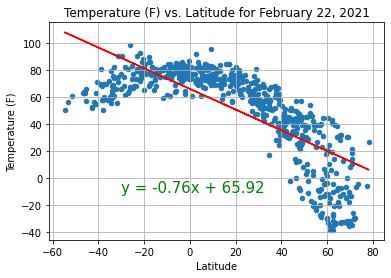

<Figure size 720x360 with 0 Axes>

In [11]:
# Create a series of scatterplots to showcase the following relationships:

# Temperature (F) vs. Latitude
# This is not needed, obtained Temp in F from the API
# convert temperature from Kelvin to Fahrenheit
# wx_df['temp_f'] = wx_df['temp_k'] * 9/5 - 459.67

title = f'Temperature (F) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = wx_df['lat']
y_values = wx_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,-10), fontsize=15, color='green')

# set the figure size
fig = plt.figure(figsize=(10,5))
# save the plot as an image
fig.savefig('../output_data/temp v lat.png', bbox_inches='tight', dpi=150)
# TODO: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.show()

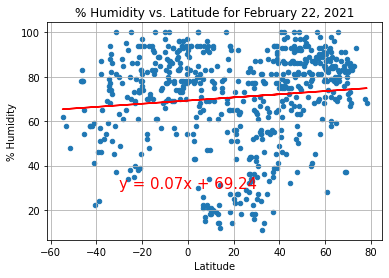

In [12]:
# Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = wx_df['lat']
y_values = wx_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,30), fontsize=15,color='red')

plt.show()

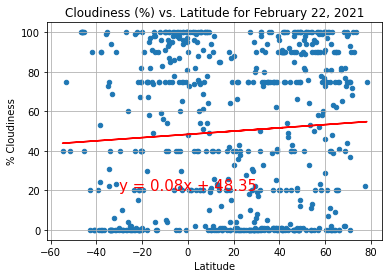

In [13]:
# Cloudiness (%) vs Latitude
title = f'Cloudiness (%) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = wx_df['lat']
y_values = wx_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=15, color='red')

plt.show()

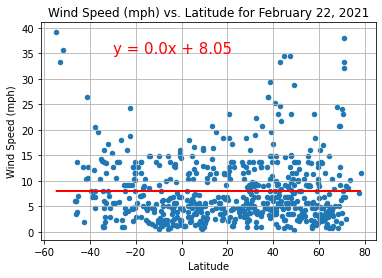

In [14]:
# Wind Speed (mph) vs. Latitude
title = f'Wind Speed (mph) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = wx_df['lat']
y_values = wx_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,35), fontsize=15, color='red')
plt.show()

In [15]:
# Inspect the data and remove the cities where the humidity > 100%.
#high_humid_df = wx_df[wx_df['humidity'] > 80]
#high_humid_df

wx_df = wx_df[wx_df['humidity'] < 101]
wx_df
## Skip this step if there are no cities that have humidity > 100%.

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Moussoro,TD,2427336,16.4901,13.6408,69.62,69.62,14,20,12.48
Ostrovnoy,RU,556268,39.5131,68.0531,-6.66,-6.66,85,2,24.45
Hilo,US,5855927,-155.0900,19.7297,73.76,77.00,65,40,6.91
Ponta do Sol,PT,2264557,-17.1000,32.6667,56.93,61.00,78,33,1.01
Peregu Mare,RO,671151,20.9000,46.2333,39.09,39.20,81,0,6.91
...,...,...,...,...,...,...,...,...,...
Srīvardhan,IN,1255619,73.0167,18.0333,77.11,77.11,65,42,2.66
Sudak,UA,692315,34.9667,44.8500,41.41,41.41,68,20,0.78
Colares,PT,2269142,-9.4469,38.7992,58.03,59.00,88,40,10.36


In [16]:
wx_df.count


<bound method DataFrame.count of              Country  City ID       lon      lat  temperature  \
City                                                            
Moussoro          TD  2427336   16.4901  13.6408        69.62   
Ostrovnoy         RU   556268   39.5131  68.0531        -6.66   
Hilo              US  5855927 -155.0900  19.7297        73.76   
Ponta do Sol      PT  2264557  -17.1000  32.6667        56.93   
Peregu Mare       RO   671151   20.9000  46.2333        39.09   
...              ...      ...       ...      ...          ...   
Srīvardhan        IN  1255619   73.0167  18.0333        77.11   
Sudak             UA   692315   34.9667  44.8500        41.41   
Colares           PT  2269142   -9.4469  38.7992        58.03   
General Roca      AR  3855065  -67.5833 -39.0333        80.60   
Safranbolu        TR   740430   32.6942  41.2508        31.57   

              max temperature  humidity  clouds  windspeed  
City                                                        

In [17]:
# Run Linear Regression on each relationship.
# Separate the plots int Northern Hemi (>=0 degrees lat) and 
north_df = wx_df[wx_df['lat'] >= 0]
north_df

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Moussoro,TD,2427336,16.4901,13.6408,69.62,69.62,14,20,12.48
Ostrovnoy,RU,556268,39.5131,68.0531,-6.66,-6.66,85,2,24.45
Hilo,US,5855927,-155.0900,19.7297,73.76,77.00,65,40,6.91
Ponta do Sol,PT,2264557,-17.1000,32.6667,56.93,61.00,78,33,1.01
Peregu Mare,RO,671151,20.9000,46.2333,39.09,39.20,81,0,6.91
...,...,...,...,...,...,...,...,...,...
Monclova,MX,3995523,-101.4167,26.9000,70.63,70.63,32,0,6.93
Srīvardhan,IN,1255619,73.0167,18.0333,77.11,77.11,65,42,2.66
Sudak,UA,692315,34.9667,44.8500,41.41,41.41,68,20,0.78


In [18]:
# Southern Hemi ( < 0 degrees lat)
south_df = wx_df[wx_df['lat'] < 0]
south_df.count


<bound method DataFrame.count of               Country  City ID       lon      lat  temperature  \
City                                                             
Ushuaia            AR  3833367  -68.3000 -54.8000        50.00   
Atuona             PF  4020109 -139.0333  -9.8000        78.78   
Bambanglipuro      ID  1650434  110.2833  -7.9500        75.96   
Busselton          AU  2075265  115.3333 -33.6500        61.48   
Saldanha           ZA  3361934   17.9442 -33.0117        60.80   
...               ...      ...       ...      ...          ...   
Mazagão            BR  3395042  -51.2894  -0.1150        77.00   
Porto Velho        BR  3662762  -63.9039  -8.7619        84.20   
Kismayo            SO    55671   42.5454  -0.3582        77.99   
Pau Brasil         BR  3454743  -39.6511 -15.4642        73.29   
General Roca       AR  3855065  -67.5833 -39.0333        80.60   

               max temperature  humidity  clouds  windspeed  
City                                          

Text(0, 0, 'y = -1.43x + 94.46')

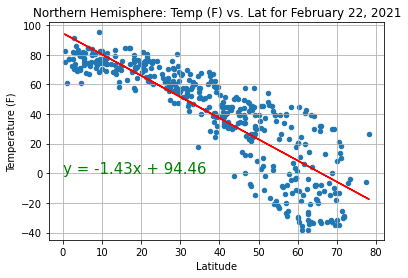

In [19]:
# Northern Hemisphere
# Temperature (F) vs. Latitude

title = f'Northern Hemisphere: Temp (F) vs. Lat for {today}'
north_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = north_df['lat']
y_values = north_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,0), fontsize=15, color='green')


Text(-30, 50, 'y = 0.36x + 81.05')

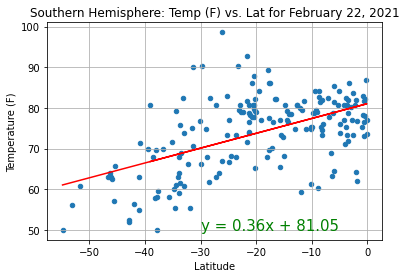

In [20]:
# Southern Hemisphere
# Temperature (F) vs. Latitude

title = f'Southern Hemisphere: Temp (F) vs. Lat for {today}'
south_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = south_df['lat']
y_values = south_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50), fontsize=15, color='green')

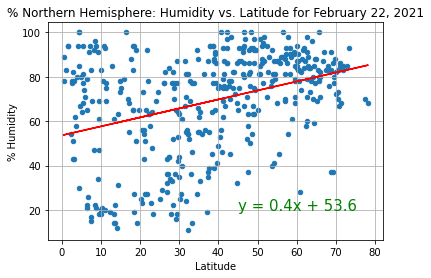

In [21]:
# Northern Hemisphere: Humidity (%) vs. Latitude
title = f'% Northern Hemisphere: Humidity vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = north_df['lat']
y_values = north_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(45,20), fontsize=15,color='green')

plt.show()

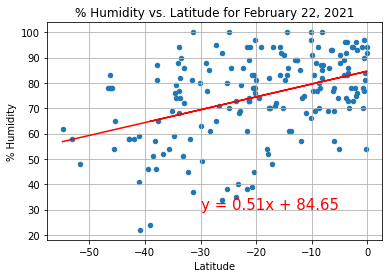

In [22]:
# Southern Hemiphere Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = south_df['lat']
y_values = south_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,30), fontsize=15,color='red')

plt.show()

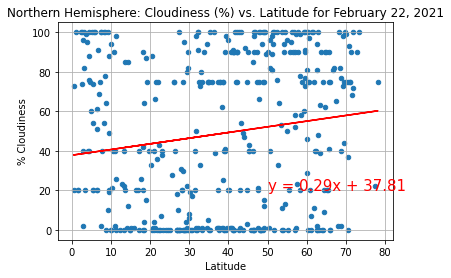

In [23]:
# Northern Hemisphere: Cloudiness (%) vs Latitude
title = f'Northern Hemisphere: Cloudiness (%) vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = north_df['lat']
y_values = north_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(50,20), fontsize=15, color='red')

plt.show()

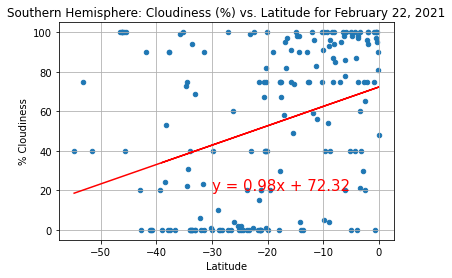

In [24]:
# Southern Hemisphere: Cloudiness (%) vs Latitude
title = f'Southern Hemisphere: Cloudiness (%) vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = south_df['lat']
y_values = south_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=15, color='red')

plt.show()

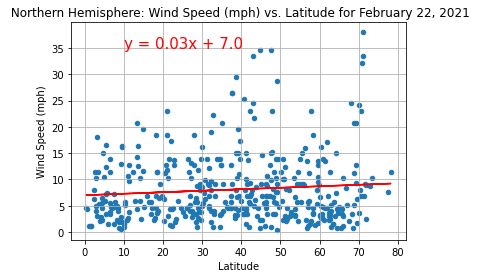

In [25]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude
title = f' Northern Hemisphere: Wind Speed (mph) vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = north_df['lat']
y_values = north_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(10,35), fontsize=15, color='red')
plt.show()

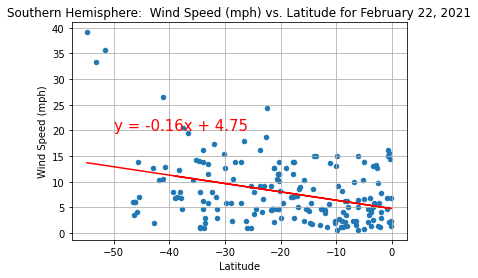

In [26]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude
title = f'Southern Hemisphere:  Wind Speed (mph) vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = south_df['lat']
y_values = south_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-50,20), fontsize=15, color='red')

file_name = f'../output_data/{}.png'
plt.savefig('')

plt.show()

In [27]:
## Save the plotted figures as .pngs.